<div id="title">The Euclidean Plane</div>
<br />
<div id="toc"></div>
<br />
<div id="codeToggle"></div>

In [362]:
%%html
<script src="js/common_utils.js" />

In [363]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d


lavender = '#9F81F7'


def plot_3d_vector_field(F, xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), num_grid_points=4, use_color=False):
    """ 
        Plot a 3D vector field, optionally with fixed height arrows with magnitude indicated
        by the color.
        
        F: a function that takes input x, y, z, each of which are numpy arrays of length
        N. The values x[i], y[i], z[i] comprise a single point. The function F should
        return u, v, w, where u[i], v[i], w[i] represent a vector at point (x[i], y[i], z[i]).
                
        xlim, ylim, zlim: Tuples equal to (lower_bound, upper_bound) for each axis.
        
        num_grid_points: The number of points along each axis to evaluate F.
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # create a grid to evaluate the function F
    X,Y,Z = np.meshgrid(np.linspace(xlim[0], xlim[1], num_grid_points),
                        np.linspace(ylim[0], ylim[1], num_grid_points),
                        np.linspace(zlim[0], zlim[1], num_grid_points))
    
    # evaluate the vector field at all the points
    U, V, W = F(X.ravel(), Y.ravel(), Z.ravel())
                    
    # set a color vector equal to the magnitude of each point
    if use_color:
        cmap = plt.cm.seismic
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        c = magnitude / magnitude.max()
        c = cmap(c)
    else:
        c = 'r'
    
    # plot the points
    ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c='k')
           
    # determine the vector display length
    len_frac = int(use_color)*0.25 + 0.25
    lim = np.array([xlim, ylim, zlim])
    rng = lim[:, 1] - lim[:, 0]
    max_rng = rng.max()
    vlen = len_frac*(max_rng / num_grid_points)
        
    # plot the vector field    
    ax.quiver(X, Y, Z, 
               U.reshape(X.shape), V.reshape(Y.shape), W.reshape(Z.shape),
               length=vlen,               
               color=c,
               normalize=use_color
               )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    
class Arrow3D(FancyArrowPatch):
    """ Taken from: https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector """

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

        
def plot_arrow3d(p, v, arrowstyle='-|>', linewidth=1, mutation_scale=20, color='k',
                 linestyle='-'): 
    """ Plot an vector v originating at point p, on axis ax. """
    a = Arrow3D([p[0], v[0]], [p[1], v[1]], [p[2], v[2]],
                mutation_scale=mutation_scale, lw=linewidth,
                arrowstyle=arrowstyle, linestyle=linestyle,
                color=color)
    plt.gca().add_artist(a)
    

def plot_parallelogram(p, v, w, vtext=None, wtext=None, ntext=None,
                       show_all_sides=True, show_normal=True, color=lavender, alpha=0.75):
    """
        Plot a parallelogram in 3D space specified by two vectors and originating at point p.
        
        p: The (x, y, z) location of the originating point.
        v: The 3D vector coordinates of the first side, with respect to p.        
        w: The 3D vector coordinates of the second side, with respect to p.
        vtext: Text label to show along side the vector v.
        wtext: Text label to show along side the vector w.
        ntext: Text label to show along side of the normal vector, v x w
        show_all_sides: Whether to show the parallelogram sides opposite to v and w
        show_normal: Show an arrow for the normal vector, originating from p.
        color: The color of the parallelogram
        alpha: The alpha of the parallelogram    
    """

    ax = plt.gca()
    # construct a list of vertices that comprise the parallelogram and add it to the plot
    verts = list()
    verts.append(p)
    verts.append(p+v)
    verts.append(p+v+w)
    verts.append(p+w)    
    pgram = art3d.Poly3DCollection((verts,), alpha=alpha, color=color)
    ax.add_collection(pgram)
    
    # show the point p
    ax.scatter([0], [0], [0], c='k')
    
    # show the vectors
    plot_arrow3d(p, p+v, color='k')
    plot_arrow3d(p, p+w, color='k')
    
    # optionally draw the connecting lines to the parallelogram
    if show_all_sides:
        plot_arrow3d(p+w, p+w+v, color='k', linestyle='--', arrowstyle='-')
        plot_arrow3d(p+v, p+v+w, color='k', linestyle='--', arrowstyle='-')
        
    if show_normal:
        n = np.cross(v, w)
        plot_arrow3d(p, p+n, color='k')
        if ntext is not None:
            tloc = n / 2
            ax.text(tloc[0], tloc[1], tloc[2], ntext, zdir=n, color='r')    
        
    if vtext is not None:
        tloc = v / 2
        ax.text(tloc[0], tloc[1], tloc[2], vtext, zdir=v, color='r')
        
    if wtext is not None:
        tloc = w / 2
        ax.text(tloc[0], tloc[1], tloc[2], wtext, zdir=w, color='r')         


$$\DeclareMathOperator*{\argmax}{arg\,max}$$
$$\DeclareMathOperator*{\argmin}{arg\,min}$$

## Introduction

This is a review of essential topics about the Euclidean plane. The n-dimensional *Euclidean plane* is the set of all tuples of the form $(x_1, ..., x_n)$, where $x_i \in \mathbb{R}$. Here we will limit our studies to objects in $\mathbb{R}^2$ and $\mathbb{R}^3$. First we make a subtle but important distinction between *points* and *vectors* in $\mathbb{R}^3$. Basically a point is a location in three dimensional space, while a vector is an directed arrow that originates at a point. The term "tangent vector" is often used interchangeably with "vector" in Differential Geometry literature. Here we'll mostly use *tangent vector* to describe a vector that is the derivative of some function at a point. The two types of functions we talk about are *scalar-valued* functions and *vector-valued* functions. Both take points in $\mathbb{R}^3$ as input, but vector-valued functions that return a three dimensional vector as output are called *vector fields*.

There is a section about the *gradient*, which turns a scalar-valued function into a vector field, and then *directional derivatives* of scalar-valued functions, which compute how a scalar-valued function changes in a given direction. Then we talk about operations that quantify vector fields, such as the *divergence* that measures the outward flow of a vector field, and the *curl* which measures it's rotation. The role of the *cross product* in creating the normal vectors that define two-dimensional planes in $\mathbb{R}^3$ is integrated into those topics. The next topic is *covariant derivatives* of vector fields. Similar to how a directional derivative tells us how a scalar-valued function changes in a given direction, covariant derivatives tell us how a vector field changes in a given direction. Finally, we talk about different *coordinate systems* in $\mathbb{R}^3$ and how to change between them.

## Points, vectors, scalar-valued functions, and vector fields

A *point* $p=(x,y,z)$ determines an absolute position in space, while a *vector* $(p, v)$ originates at a point $p$ and has a magnitude and direction specified by $v$.

A scalar-valued *function* $f$ on $\mathbb{R}^3$ maps a point $(x,y,z)$ to some scalar value $f(x, y, z)$. 

A *vector field* is a function $F(p)$, $F:\mathbb{R}^3 \rightarrow \mathbb{R}^3$ that assigns a tangent vector $F(p) = v \in \mathbb{R}^3$ to each point $p \in \mathbb{R}^3$. There are a few ways of writing a vector field. The first is as a vector of functions:

$$F(x, y, z) = \begin{pmatrix}f_1(x, y, z)\\f_2(x, y, z)\\f_3(x, y, z)\end{pmatrix}$$

The functions $f_1$, $f_2$, $f_3$ are called *coordinate functions*.

Another common way of writing a vector fields, often used in physics, is to use the basis vectors $\hat{i}$, $\hat{j}$, $\hat{k}$:

$$F(x, y, z) = f_1(x, y, z) ~ \hat{i} + f_2(x, y, z) ~ \hat{j} + f_3(x, y, z) ~ \hat{k}$$

The basis vectors are equal to the *natural basis* of $\mathbb{R}^3$:

$$\hat{i} = \begin{pmatrix}1\\0\\0\end{pmatrix} ~~~ \hat{j} = \begin{pmatrix}0\\1\\0\end{pmatrix} ~~~ \hat{k} = \begin{pmatrix}0\\0\\1\end{pmatrix}$$

Here are some examples of 2D vector fields, where the magnitude of the vector is represented by it's length:

<IPython.core.display.Javascript object>


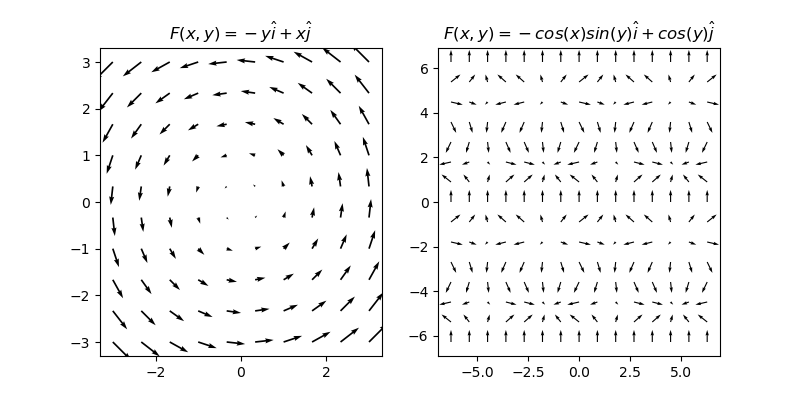

Text(0.5,1,'$F(x,y)=-cos(x)sin(y) \\hat{i} + cos(y) \\hat{j}$')

In [364]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.figure()
ax = plt.subplot(1, 2, 1)
xx = np.linspace(-3, 3, 10)
# generate the locations of the points
X,Y = np.meshgrid(xx, xx)
# evaluate the vector field on the points
U = -Y
V = X
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-y \hat{i} + x \hat{j}$')

ax = plt.subplot(1, 2, 2)
xx = np.linspace(-2*np.pi, 2*np.pi, 15)
X,Y = np.meshgrid(xx, xx)
U = -np.cos(X)*np.sin(Y)
V = np.cos(Y)
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-cos(x)sin(y) \hat{i} + cos(y) \hat{j}$')

Here is an example of a three dimensional vector field, where the points are black dots, and the vectors are displayed as arrows that originate from their respective points, with a length equal to their magnitude (scaled for visualization):

<IPython.core.display.Javascript object>


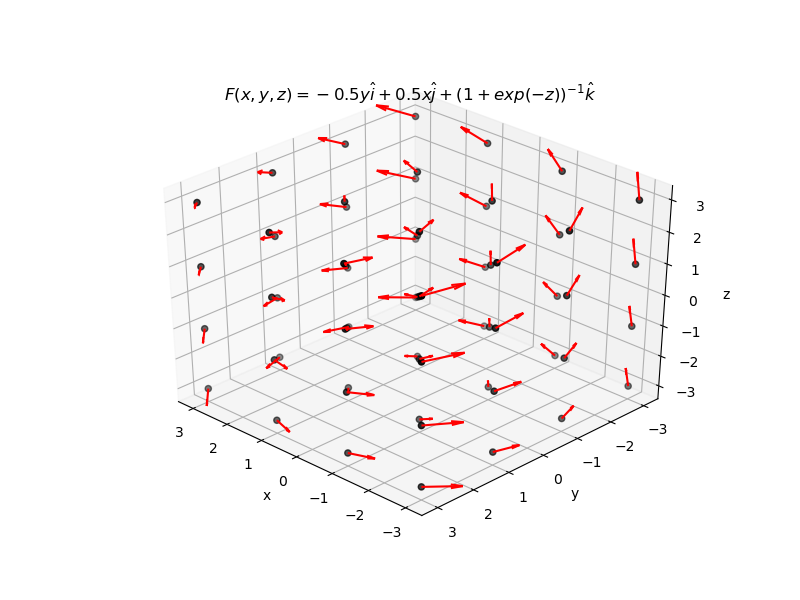

Text(0.5,0.92,'$F(x,y,z)=-0.5y \\hat{i} + 0.5x \\hat{j} + (1 + exp(-z))^{-1} \\hat{k}$')

In [365]:
plt.rcParams["figure.figsize"] = (8, 6)
def F(x, y, z): return -y*0.5, x*0.5, 1 / (1 + np.exp(-z))
plot_3d_vector_field(F)    
plt.title('$F(x,y,z)=-0.5y \hat{i} + 0.5x \hat{j} + (1 + exp(-z))^{-1} \hat{k}$')
    

A [differential equation](https://en.wikipedia.org/wiki/Differential_equation) can also be considered a vector field:

$$\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix} = \begin{pmatrix}f_1(x, y, z)\\f_2(x, y, z)\\f_3(x, y, z)\end{pmatrix}$$

Each point in space $(x, y, z)$ is assigned a tangent vector equal to $\dot{x} ~ \hat{i} + \dot{y} ~ \hat{j} + \dot{z} ~ \hat{k}$. For example there is a vector field for the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system), a famous 3D system that exibits chaotic dynamics:

$$\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix} = \begin{pmatrix}10(y-x)\\x(28-z) - y\\xy - \frac{8}{3} z\end{pmatrix}$$

We can plot the Lorenz equations as a vector field in three dimensional space, using color to indicate the magnitude of each vector instead of length:

<IPython.core.display.Javascript object>


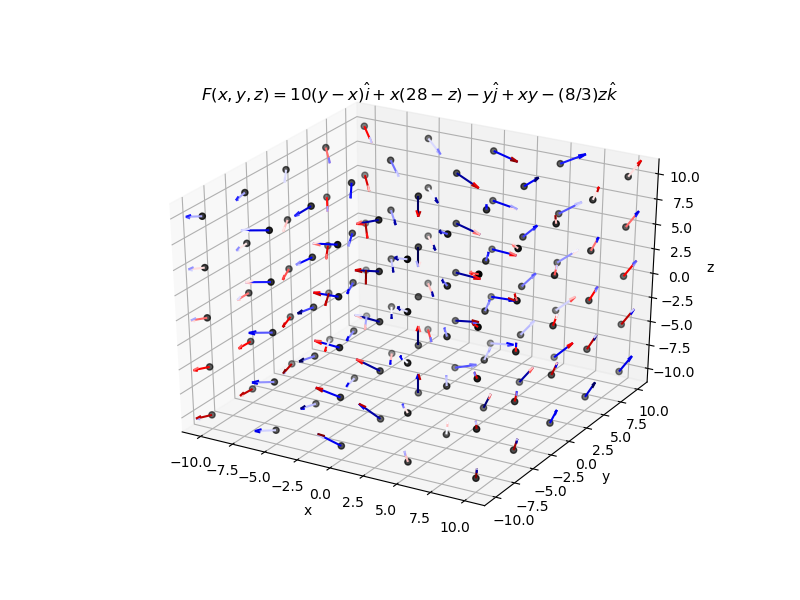

Text(0.5,0.92,'$F(x,y,z)=10(y-x) \\hat{i} + x(28-z)-y \\hat{j} + xy-(8/3)z \\hat{k}$')

In [366]:
plt.rcParams["figure.figsize"] = (8, 6)
def F(x, y, z): return 10*(y-x), x*(28-z)-y, x*y - (8 / 3)*z
plot_3d_vector_field(F, use_color=True, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10), num_grid_points=5)    
plt.title('$F(x,y,z)=10(y-x) \hat{i} + x(28-z)-y \hat{j} + xy-(8/3)z \hat{k}$')


A particle placed at a point in that space can expect a push in the direction of the arrow with a force proportional to the color of the arrow (blue is weak, red is strong).

## The gradient of scalar-valued functions and gradient descent

The *gradient* of a scalar-valued function $f:\mathbb{R}^3 \rightarrow \mathbb{R}$ is a vector of partial derivatives of $f$:

$$\nabla f(x, y, z) = \begin{pmatrix}\frac{\partial f}{\partial x}(x, y, z)\\\frac{\partial f}{\partial y}(x, y, z)\\\frac{\partial f}{\partial z}(x, y, z)\end{pmatrix}$$

The gradient of a function defines a vector field associated with that function. Here's a plot of a 2D function $f(x,y) = x^2 + y^2$ and the vector field defined by it's gradient $\nabla f = 2x \hat{i} + 2y \hat{j}$:

<IPython.core.display.Javascript object>


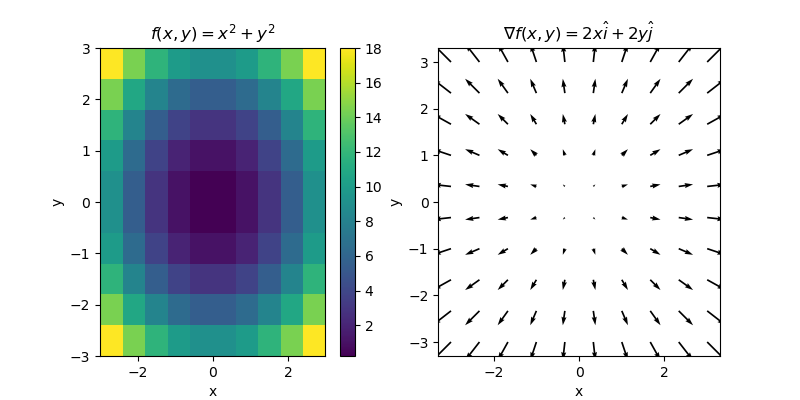

Text(0.5,1,'$\\nabla f(x, y) = 2x \\hat{i} + 2y \\hat{j}$')

In [367]:
plt.rcParams["figure.figsize"] = (8, 4)
xx = np.linspace(-3, 3, 10)
X,Y = np.meshgrid(xx, xx)
Z = X**2 + Y**2
U = 2*X
V = 2*Y

plt.figure()
ax = plt.subplot(1, 2, 1)
plt.imshow(Z, aspect='auto', cmap=plt.cm.viridis, extent=(X.min(), X.max(), Y.min(), Y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('$f(x, y) = x^2 + y^2$')

ax = plt.subplot(1, 2, 2)
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$\\nabla f(x, y) = 2x \hat{i} + 2y \hat{j}$')

You can see on the left that the function has a minimum at $f(0, 0)$ and increases as either component increases. The vector field on the right shows the *rate of increase*, a larger arrow indicates that $f(x,y)$ increases faster as the absolute values of $x$ and $y$ increase.

There are probably many wonderful things to say about gradients of scalar-valued functions. One of the most important algorithms in Machine Learning is [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), which seeks to minimize some function $f(\beta)$ where $\beta \in \mathbb{R}^n$ is a vector of *parameters* that are *optimal* when $f(\beta)$ is at it's *smallest*.

Gradient descent starts with an initial guess $\beta \in \mathbb{R}^n$. At each iteration $k$, it updates the parameter vector in the direction of the gradient of $f(\beta)$:

$$\beta_{k+1} = \beta_k - \gamma \nabla f(\beta_k)$$

The scalar $\gamma \in \mathbb{R}$ is called the *learning rate*, which for our purposes is just a constant.


## Directional derivatives of scalar-valued functions

In gradient descent, the direction $-\nabla f(\beta_k)$ is often called the *direction of steepest descent*. Why is this? There are many answers in [this math stack exchange post](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent). Many of the answers to this question require knowledge of the *directional derivative*. The [directional derivative](https://en.wikipedia.org/wiki/Directional_derivative) of a scalar-valued function $f(x, y, z)$ is a scalar, it tells us how fast $f$ is changing in the direction of a vector $v \in \mathbb{R}^3$, at the point $p=(x,y,z)$. There are many ways of writing it, the notation used here is $D_v f_p$ or $D_v f(x,y,z)$. The directional derivative of a scalar-valued function can be computed as:

$$ D_v f(x, y, z) = v_1 \frac{\partial f}{\partial x}(x, y, z) + v_2 \frac{\partial f}{\partial y}(x, y, z) + v_3 \frac{\partial f}{\partial z}(x, y, z)$$

So, when we are working in cartesian coordinates, the directional derivative of a scalar-valued function is just the dot product of the vector $v$ and the gradient:

$$D_v f(x, y, z) = \nabla f (x, y, z) \cdot v$$

To reduce clutter, $f(x, y, z)$ will be written as $f_p$, and $\nabla f(x, y, z)$ will be written as $\nabla f_p$.

The directional derivative can be used to prove why $\nabla f_p$ is the direction of steepest *ascent*, the direction of greatest *increase*. First, recall the [relationship between the dot product and the angle between two vectors](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition), which we'll call $\theta \in [-\pi, \pi]$:

$$\frac{\nabla f_p \cdot v}{|\nabla f_p| |v|} = cos(\theta)$$

Assume $v$ is a unit vector, so that $|v|=1$:

$$\frac{\nabla f_p}{|\nabla f_p|} \cdot v = cos(\theta)$$

We want to find the $v$ that maximizes this equation, which by inspection, would be a vector that makes an angle of $\theta = 0$ with $\nabla f_p$, i.e. a vector that is *parallel* to $\nabla f_p$. When $\theta = 0$, $cos(\theta)=1$, and we can rewrite the equation as:

$$\frac{\nabla f_p}{|\nabla f_p|} \cdot v = 1$$

This implies that the only unit vector $v$ that can maximize the directional derivative is $\frac{\nabla f_p}{|\nabla f_p|}$. So the gradient is the direction of steepest *ascent* because it is the vector that *maximizes* it's own directional derivative. It then follows that $-\nabla f_p$, the opposite direction, is the direction of steepest *descent* at point $p$.

## The divergence of a vector field

There are several ways to quantify the behavior of a vector field. The *divergence* is a scalar value that quantifies the [amount of flow](https://en.wikipedia.org/wiki/Divergence#Physical_interpretation_of_divergence) at a point $p=(x, y, z)$ for a vector field $F(p) = f_1(p) ~ \hat{i} + f_2(p) ~ \hat{j} + f_3(p) ~ \hat{k}$.

For a vector field with the usual cartesian $(\hat{i}, \hat{j}, \hat{k})$ coordinates, the divergence is computed by summing the partial derivatives of the coordinate functions:

$$\nabla \cdot F(p) = \frac{\partial f_1}{\partial x}(p) + \frac{\partial f_2}{\partial y}(p) + \frac{\partial f_3}{\partial z}(p)$$

When using a different coordinate system, like spherical or cylindrical coordinates, [the expression is different](https://en.wikipedia.org/wiki/Del_in_cylindrical_and_spherical_coordinates).
 
The following plots show 2D vector fields on the left, along with plots of their divergences on the right. When the vector field has an "outward flow", the divergence is positive. When the vector field has an "inward flow" towards a fixed point, the divergence is negative:

<IPython.core.display.Javascript object>


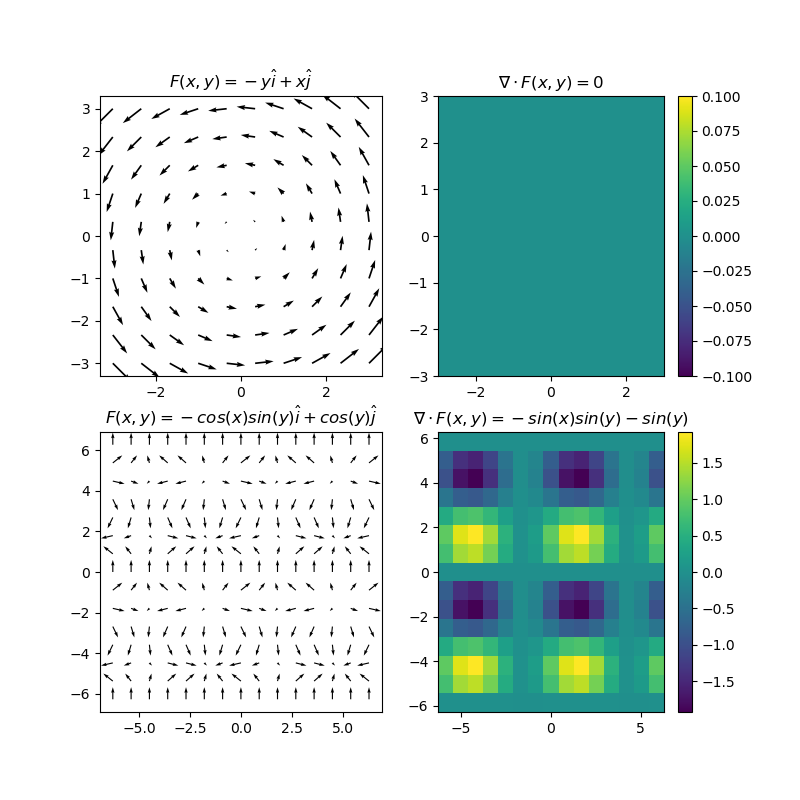

Text(0.5,1,'$\\nabla \\cdot F(x,y)=-sin(x)sin(y) - sin(y)$')

In [368]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.figure()
ax = plt.subplot(2, 2, 1)
xx = np.linspace(-3, 3, 10)
# generate the locations of the points
X,Y = np.meshgrid(xx, xx)
# evaluate the vector field on the points
U = -Y
V = X
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-y \hat{i} + x \hat{j}$')

ax = plt.subplot(2, 2, 2)
div = np.zeros_like(U) + np.zeros_like(V)
plt.imshow(div, aspect='auto', cmap=plt.cm.viridis, extent=[X.min(), X.max(), Y.min(), Y.max()])
plt.colorbar()
plt.title('$\\nabla \cdot F(x,y)=0$')

ax = plt.subplot(2, 2, 3)
xx = np.linspace(-2*np.pi, 2*np.pi, 15)
X,Y = np.meshgrid(xx, xx)
U = -np.cos(X)*np.sin(Y)
V = np.cos(Y)
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-cos(x)sin(y) \hat{i} + cos(y) \hat{j}$')

ax = plt.subplot(2, 2, 4)
div = -np.sin(X)*np.sin(Y) - np.sin(Y)
plt.imshow(div, aspect='auto', cmap=plt.cm.viridis, extent=[X.min(), X.max(), Y.min(), Y.max()])
plt.colorbar()
plt.title('$\\nabla \cdot F(x,y)=-sin(x)sin(y) - sin(y)$')

## The cross product of two vectors

The curl is another method for quantifying vector fields, but before introducting that, it's useful to know what the *cross product* is. The [cross product](https://en.wikipedia.org/wiki/Cross_product) is an operation that takes two input vectors $v, w \in \mathbb{R}^3$, and produces an output vector $n = v \times w$, $n \in \mathbb{R}^3$. The output vector that it produces is perpendicular to the two input vectors. The magnitude of the output vector is equal to the area of the parallelogram that the two input vectors make. Here is a plot to help visualize the cross product $v \times w$:

<IPython.core.display.Javascript object>


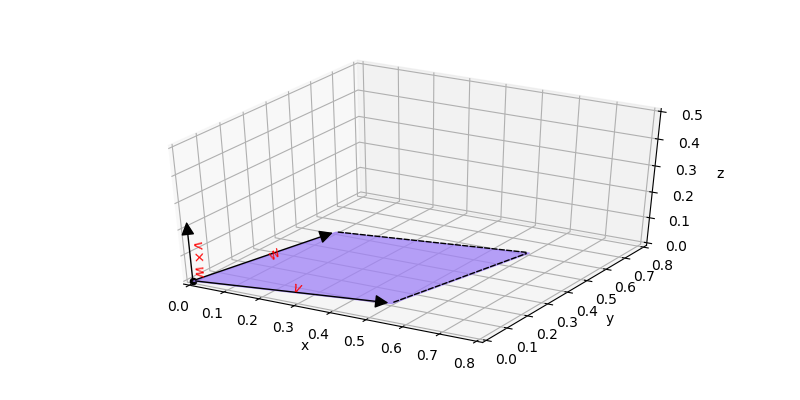

/home/mschachter/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/mschachter/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/home/mschachter/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'z':


(0, 0.8)

In [369]:
plt.rcParams["figure.figsize"] = (8, 4)
fig = plt.figure()
ax = fig.gca(projection='3d')

p = np.array([0, 0, 0])
v = np.array([0.5, 0.1, 0])
w = np.array([0.1, 0.5, 0])

plot_parallelogram(p, v, w, vtext='$v$', wtext='$w$', ntext='$v \\times w$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim([0, 0.5])
ax.set_xlim([0, 0.8])
ax.set_ylim([0, 0.8])
    

The plot shows the vectors $v = (0.1, 0.5, 0)$ and $w = (0.5, 0.1, 0)$ originating from a point $p = (0, 0, 0)$. The vectors form two sides of a parallelogram, which is completed in the plot using two dashed lines. The cross product $v \times w$ is plotted and can seen to be perpendicular to $v$, $w$, and the plane that the parallelogram lies in. The parallelogram is colored purple and it's area can be computed as:

$$area = |v \times w| = |v| |w| sin(\theta)$$

where $\theta$ is the angle between $v$ and $w$. The cross product is only applicable in $\mathbb{R}^2$ and $\mathbb{R}^3$, it does not generalize to $\mathbb{R}^n$. Computing a normal vector, or volumes in higher dimensions, is the topic of [exterior calculus](https://en.wikipedia.org/wiki/Exterior_algebra). One way to describe the calculation of the cross product is to define how it [operates algebraically on the basis vectors](https://en.wikipedia.org/wiki/Cross_product#Coordinate_notation) $(\hat{i}, \hat{j}, \hat{k})$:

$$
\begin{align}
\hat{i} \times \hat{j} & = \hat{k} \\
\hat{j} \times \hat{k} & = \hat{i} \\
\hat{k} \times \hat{i} & = \hat{j}
\end{align}
$$

The cross product is distributive over addition, and [anti-commutative](https://en.wikipedia.org/wiki/Anticommutativity):

$$
\begin{align}
Distributivity & ~~~ v \times (u + w) = v \times w + v \times w \\
Anti-commutativity & ~~~ u \times v = -v \times u \\
 & ~~~ u \times u = 0
\end{align}
$$

Using these properties, the cross product can then be defined for two vectors $v = v_1 \hat{i} + v_2 \hat{j} + v_3 \hat{k}$ and $u = u_1 \hat{i} + u_2 \hat{j} + u_3 \hat{k}$:

$$
\begin{align}
u \times v & = (v_1 \hat{i} + v_2 \hat{j} + v_3 \hat{k}) \times (u_1 \hat{i} + u_2 \hat{j} + u_3 \hat{k}) \\
 & = v_1 u_1 \hat{i} \times \hat{i} + v_1 u_2 \hat{i} \times \hat{j} + v_1 u_3 \hat{i} \times \hat{k} \\
 & + v_2 u_1 \hat{j} \times \hat{i} + v_2 u_2 \hat{j} \times \hat{j} + v_2 u_3 \hat{j} \times \hat{k} \\
 & + v_3 u_1 \hat{k} \times \hat{i} + v_3 u_2 \hat{k} \times \hat{j} + v_3 u_3 \hat{k} \times \hat{k} 
\end{align}
$$

Terms such as $\hat{i} \times \hat{i}$ cancel out, and terms such as $\hat{j} \times \hat{i}$ can be turned into $-\hat{i} \times \hat{j}$ due to anti-commutativity, so the equation becomes:

$$
\begin{align}
 u \times v & = ~~~0~~~ + v_1 u_2 \hat{i} \times \hat{j} - v_1 u_3 \hat{k} \times \hat{i} \\
 & - v_2 u_1 \hat{i} \times \hat{j} + ~~~0~~~ + v_2 u_3 \hat{j} \times \hat{k} \\
 & + v_3 u_1 \hat{k} \times \hat{i} - v_3 u_2 \hat{j} \times \hat{k} + ~~~0~~~
\end{align}
$$

combining like terms and using the basis vector identities for the cross product then gives the final equation:

$$u \times v = (v_1 u_2 - v_2 u_1) \hat{k} + (v_3 u_1 - v_1 u_3) \hat{j} + (v_2 u_3 - v_3 u_2) \hat{i}$$

A cute mnemonic for compute the cross product is as the [determinant of this haphazardly mixed-type matrix](https://en.wikipedia.org/wiki/Cross_product#Matrix_notation):

$$
u \times v = 
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k} \\ 
v_1 & v_2 & v_3 \\ 
u_1 & u_2 & u_3
\end{vmatrix}
$$

The relationship between cross products and determinants of vectors actually goes much deeper and requires some knowledge of the wedge product in exterior algebra to understand fully.




## The equation for a plane

A two-dimensional plane in $\mathbb{R}^3$ is the simplest example of a *surface*, a key object in differential geometry. There are two major representations for a plane at a point $p = (x, y, z)$. The first representation is as a vector subspace, where there are two linearly independent *basis vectors* $u$ and $v$, and any point on the plane can be written as a linear combination of those two basis vectors. Let $S \subset \mathbb{R}^3$ represent the plane that is spanned by $u$ and $v$, then any $q \in S$ can be written as:

$$q = a \begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix} + b \begin{pmatrix} v_1 \\ v_2 \\ v_3 \end{pmatrix} $$

for $a, b \in \mathbb{R}$, with respect to the origin point $p$. To be clear, the coordinates of $q$ are not absolute with respect to the origin $(0, 0, 0)$, the coordinates of $q$ only make sense in reference to the point $p$. The absolute coordinates of the point on the plane are are $p + q$.

As discussed in the previous section, the cross product $n = u \times v$ produces a normal vector $n$ that is perpendicular to $u$ and $v$. As such, it is also perpendicular to *any point on the plane* $S$. So the normal vector $n$ and it's origin point $p$ can be used to fully describe the plane. Any point $q$ given in absolute coordinates, that lies on the plane $S$, satisfies this equation:

$$n \cdot (q - p) = 0$$

If we are only given $n$ and $p$, can we come up with a basis vector set $u$ and $v$? The answer is yes, with the caveat that there are an infinite number of pairs $(u, v)$ that comprise a basis for the plane $S$. To do this, we will take advantage of the [Gram-Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process), which orthogonalizes a set of vectors algorithmically. An algorithm for generating an orthogonal basis for the plane $S$ given only the normal vector $n$ and point $p$ is given by:

1. Generate $r_1 = p + \Delta p$, where $\Delta p$ is a Gaussian random vector in $\mathbb{R}^3$ divided by $|p|$.

2. Execute one iteration of the Gram-Schmidt process and compute $u = r_1 - \frac{n \cdot r_1}{n \cdot n} n$.

3. Generate $r_2 = p + \Delta p$ in the same way as step 1.

4. Compute $v = r_2 - \frac{n \cdot r_2}{n \cdot n} n$.

The vectors $(n, u, v)$ are orthgonal, and any arbitrary point on the surface $S$ can be generated as a linear combination of $u$ and $v$.



## The curl of a vector field




## The covariant derivative of a vector field

## Spherical and cylindrical coordinate systems, change of basis













































This is the footer